In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch 
from sklearn.preprocessing import StandardScaler


# Question 1

Using Hierarchical Clustering

In [3]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data = data.rename({'Unnamed: 0':'States'},axis=1)

In [5]:
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data1 = data.iloc[:,1:]
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
min = MinMaxScaler()
value= min.fit_transform(data1)

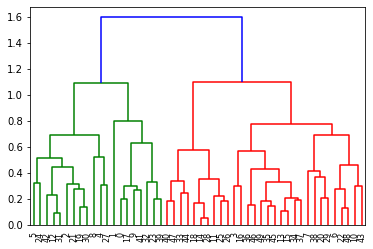

In [8]:
dendogram = sch.dendrogram(sch.linkage(value,method='complete'))

In [9]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [10]:
pred = hc.fit_predict(value)

In [11]:
data['predicted_y'] = pred

In [12]:
data.head(10)

,States,Murder,Assault,UrbanPop,Rape,predicted_y
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [13]:
data['predicted_y'].value_counts()

1    20
0    20
2    10
Name: predicted_y, dtype: int64

In [14]:
data.groupby(by='predicted_y').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
predicted_y,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


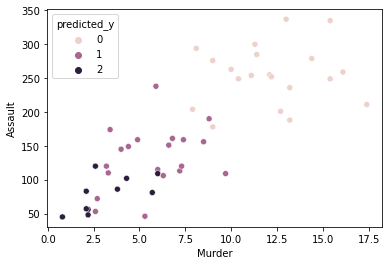

In [15]:
sns.scatterplot(x=data['Murder'],y=data.Assault,hue=data.predicted_y)


Using K-Means Clustering

In [16]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
data = data.rename({'Unnamed: 0':'States'},axis=1)

In [18]:
data1 = data.iloc[:,1:]
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [19]:
min = MinMaxScaler()
value= min.fit_transform(data1)

In [20]:
wcss = []
for i in range(1,11):
 kmeans= KMeans(n_clusters=i)
 kmeans.fit(value)
 wcss.append(kmeans.inertia_)

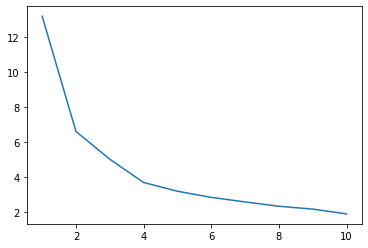

In [21]:
plt.plot(range(1,11),wcss)
plt.show()

According to elbow plot number of clusters to be formed is 4.

In [22]:
cluster = KMeans(n_clusters=4,random_state=20)


In [23]:
clust =  cluster.fit_predict(value)

In [24]:
data['predicted_y'] = clust
data.head()

,States,Murder,Assault,UrbanPop,Rape,predicted_y
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [25]:
data['predicted_y'].value_counts()

1    17
3    13
2    12
0     8
Name: predicted_y, dtype: int64

In [26]:
data.groupby('predicted_y').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
predicted_y,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.852941,141.176471,73.647059,19.335294
2,10.966667,264.000000,76.500000,33.608333
3,3.600000,78.538462,52.076923,12.176923


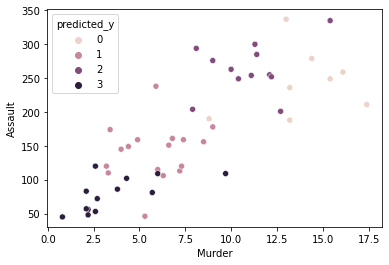

In [27]:
sns.scatterplot(x=data['Murder'],y=data.Assault,hue=data.predicted_y)

# Question 2

Using K-Means Clustering

In [28]:
data2 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [29]:
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [30]:
data2 = data2.rename({'ID#':'ID','Award?':'Award'},axis=1)

In [31]:
data2.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [32]:
data3 = data2.drop(columns=('ID'))

In [33]:
data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
std = StandardScaler()
std_df = std.fit_transform(data3)

In [35]:
wcss1 = []
for i in range(1,11):
  kmeans1 = KMeans(n_clusters=i)
  kmeans1.fit(std_df)
  wcss1.append(kmeans1.inertia_)



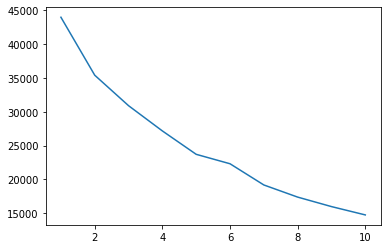

In [36]:
plt.plot(range(1,11),wcss1)
plt.show()


From this elbow plot we can see the number of clusters to be formed is 6.

In [37]:
cluster1 = KMeans(n_clusters=6,random_state=32)
cluster1.fit_predict(std_df)

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [38]:
clust1 = cluster1.labels_

In [39]:
cluster1.labels_.shape

(3999,)

In [40]:
data2['predicted_cluster'] = clust1


In [41]:
data2.head(20)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,predicted_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [42]:
data3['predicted_cluster'] = clust1

In [43]:
data2.predicted_cluster.value_counts()

2    2473
1    1264
0     143
5      61
3      43
4      15
Name: predicted_cluster, dtype: int64

In [44]:
data3.groupby('predicted_cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
predicted_cluster,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,116998.645570,60.016614,3.698576,1.000000,1.001582,39091.529272,18.725475,344.419304,1.030063,4893.337025,0.644778
2,43351.094622,42.629195,1.219976,1.000000,1.000404,4549.901334,6.795390,199.031945,0.618682,3693.358269,0.199353
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


Using DBSCAN Clustering

In [45]:
data2 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [46]:
data2 = data2.rename({'ID#':'ID','Award?':'Award'},axis=1)

In [47]:
data2.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [48]:
data3 = data2.drop(columns=('ID'))
data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
data3.shape

(3999, 11)

In [49]:
std = StandardScaler()
std_df = std.fit_transform(data3)

In [51]:
dbscan = DBSCAN(eps=1,min_samples=12,n_jobs=-1) #min_samples = coloumn+1

In [52]:
dbscan.fit_predict(std_df)

array([0, 0, 0, ..., 1, 0, 0])

In [54]:
db = dbscan.labels_

In [57]:
data2['Clusters'] = db

In [58]:
data2.head(20)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [59]:
data2.Clusters.value_counts()

 0    2266
 1    1022
-1     711
Name: Clusters, dtype: int64

In [60]:
data3['Clusters'] = db

In [61]:
data3.groupby('Clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,,
-1,166416.691983,793.471167,2.593530,1.081575,1.068917,35869.780591,20.652602,1963.396624,5.672293,4563.983122,0.64557
0,51896.169903,2.263901,1.650927,1.000000,1.000000,8883.076787,8.273169,99.702560,0.334951,3801.345543,0.00000
1,57155.303327,6.874755,2.593933,1.000000,1.000000,22436.178082,12.685910,213.172211,0.685910,4512.013699,1.00000
